# Lazy Evaluation and Parallel Computing

In [44]:
#!pip install dask
# 
#!pip install graphviz 

In [46]:
from dask import delayed
import dask
import numpy as np
import os

In [47]:

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [10]:
def my_square_function(x):
    return x**2

In [11]:
# Create delayed version of the above function
delayed_square_function = delayed(my_square_function)

In [12]:
# Use the delayed function with input 4
delayed_result = delayed_square_function(4)

In [13]:
# Print the delayed answer
print(delayed_result)

Delayed('my_square_function-d921dfb4-cd1a-4f32-8964-8017943bafe0')


In [14]:
# Delay and use function
delayed_result = delayed(my_square_function)(4)

In [15]:
print(delayed_result)

Delayed('my_square_function-fc380b9a-5cae-4e3b-8ebf-d26b4b788212')


In [16]:
real_result = delayed_result.compute() # This line is where the calculation happens

In [17]:
# Print the answer
print(real_result)

16


## Using Operations on delayed objects

In [18]:
delayed_result1 = delayed(my_square_function)(4)

In [19]:
# Operations return delayed object
delayed_result2 = (4 + delayed_result1) * 5

In [20]:
print(delayed_result2.compute())

100


## Lazy evaluation

In [21]:
x_list = [30, 85, 14, 12, 27, 62, 89, 15, 78, 0]

In [22]:
sum_of_squares = 0

In [23]:
for x in x_list:
    # Square and add numbers
    sum_of_squares += delayed(my_square_function)(x)

In [24]:
result = sum_of_squares.compute()

In [25]:
# Print the answer
print(result)

27268


## Sharing computation

In [26]:
delayed_intermediate = delayed(my_square_function)(3)

In [27]:
# These two results both use delayed_intermediate
delayed_result1 = delayed_intermediate - 5
delayed_result2 = delayed_intermediate + 4

In [28]:
# delayed_3_squared will be computed twice
print('delayed_result1:', delayed_result1.compute())
print('delayed_result2:', delayed_result2.compute())

delayed_result1: 4
delayed_result2: 13


In [30]:
# Above is inefficent instead do this
# delayed_intermediate will be computed once
comp_result1, com_result2 = dask.compute(delayed_result1, delayed_result2)

print('delayed_result1:', comp_result1)
print('delayed_result2:', com_result2)

delayed_result1: 4
delayed_result2: 13


## Exercise: Lazy evaluation

When Python is working its way through the following script, which line will it get to when the 'Converting to percentage' message is printed?

In [33]:
from dask import delayed

def fraction_to_percent(x):
     percentage = x * 100
     print('Converting to percentage')
     return x

frac = 0.3
percentage = delayed(fraction_to_percent)(frac)

In [34]:
computed_percentage = percentage.compute()

Converting to percentage


In [ ]:
print(percentage)
print(computed_percentage)

## Exercise: Lazy evaluation

In [37]:

costs_week_1 = [121, 729, 441, 961, 841, 729, 25, 225, 256, 441, 400, 484, 900]
costs_week_2 = [196,361, 81, 441, 49, 100, 729, 841, 676, 256, 121, 576, 49, 100, 49, 16, 961, 36, 841]

In [38]:
# Import the delayed function from Dask
from dask import delayed

# Lazily calculate the sums of costs_week_1 and costs_week_2
sum1 = delayed(np.sum)(costs_week_1)
sum2 = delayed(np.sum)(costs_week_2)

# Add the two delayed sums
total = sum1 + sum2

# Compute and print the final answer
print(total.compute())

13032


## Task graphs and scheduling methods

### Visualising a task graph

In [39]:
# Create 2 delayed objects
delayed_num1 = delayed(my_square_function)(3)
delayed_num2 = delayed(my_square_function)(4)

In [40]:
# Add them
result = delayed_num1 + delayed_num2

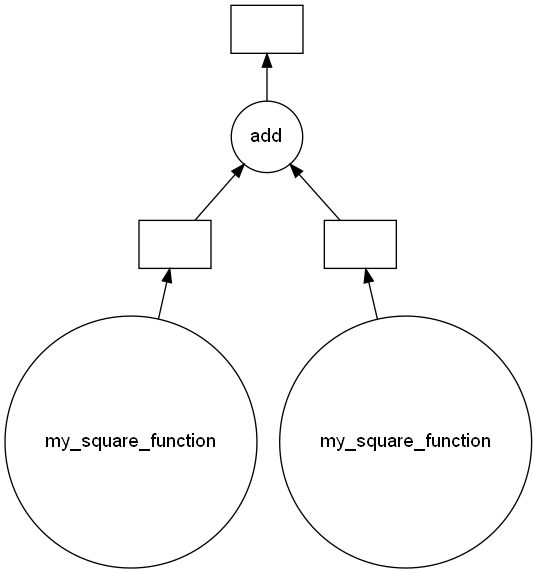

In [48]:
# Plot the task graph
result.visualize()

### Overlapping task graph

In [49]:
delayed_intermediate = delayed(my_square_function)(3)

In [50]:
# These two results both use delayed_intermediate_result
delayed_result1 = delayed_intermediate - 5
delayed_result2 = delayed_intermediate + 4

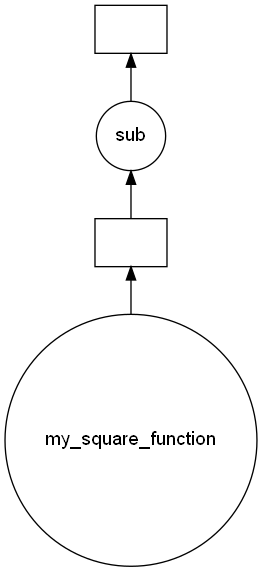

In [51]:
delayed_result1.visualize()

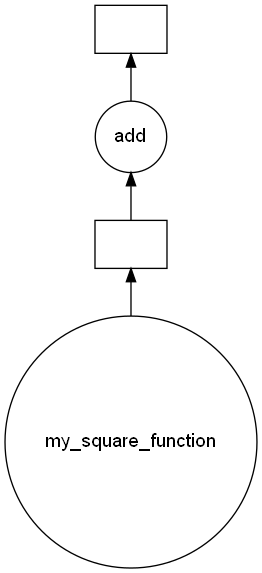

In [52]:
delayed_result2.visualize()

### Overlap task graph

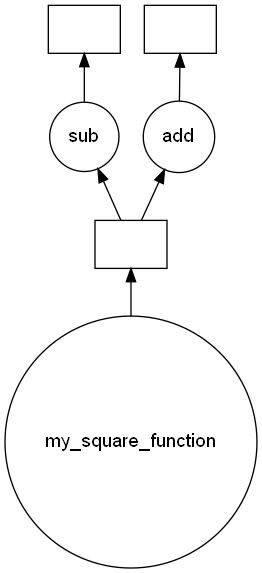

In [53]:
# Plot the task graph
dask.visualize(delayed_result1, delayed_result2)